In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pickle

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

In [7]:
def load_data(dataset):
    if dataset == 'Nasa':
        file_names = ["B0005_pro.csv", "B0006_pro.csv", "B0007_pro.csv", "B0018_pro.csv"]
    elif dataset == 'Calce':
        file_names = ["CS2_35_pro.csv", "CS2_36_pro.csv", "CS2_37_pro.csv", "CS2_38_pro.csv"]
    datasets = [pd.read_csv(f'../Data & Outputs/{dataset}/{file_name}') for file_name in file_names]

    return datasets, file_names

def create_model(dataset, regressor, type):

    if type == 'Hyper':
        with open(f'../Data & Outputs/{dataset}/{regressor}/{regressor}_best_model.pkl', 'rb') as f:
            model = pickle.load(f)
    
    elif type == 'Regular':
    
        if regressor == 'RF':
            model = RandomForestRegressor(n_jobs=-1, random_state=42)
        elif regressor == 'XGB':
            model = XGBRegressor(n_jobs=-1, random_state=42)
        elif regressor == 'LGBM':
            model = LGBMRegressor(n_jobs=-1, random_state=42)
        elif regressor == 'CAT':
            model = CatBoostRegressor(silent=True, random_state=42)

    return model

def train_and_test(model, datasets):
    test_results = []
    for i, test_data in enumerate(datasets):
        train_data = pd.concat([datasets[j] for j in range(len(datasets)) if j != i])
        X_train = train_data.drop(['cycle', 'SoH', 'cell'], axis=1)
        y_train = train_data['SoH']
        X_test = test_data.drop(['cycle', 'SoH', 'cell'], axis=1)
        y_test = test_data["SoH"]
        cycle = test_data["cycle"]


        # Replace special characters in column names
        X_train.columns = X_train.columns.str.replace('[^\w\s]', '')
        X_test.columns = X_test.columns.str.replace('[^\w\s]', '')

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        test_results.append((cycle, y_test, y_pred))
    return test_results

def plot_results(test_results, file_names, dataset, regressor, type):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    axes = axes.flatten()
    for i, (cycle, y_test, y_pred) in enumerate(test_results):
        ax = axes[i]
        if dataset == 'Nasa':
            cell_number = file_names[i].split("_")[0]
        elif dataset == 'Calce':
            cell_number = file_names[i].split("_pro")[0]  # Extract the cell number from the file name
        ax.plot(cycle, y_test, label="Actual")
        ax.plot(cycle, y_pred, label="Predicted")
        ax.set_title(f"Test cell: {cell_number}")
        ax.set_xlabel("Cycle")
        ax.set_ylabel("SoH")
        ax.grid()
        ax.legend()
    plt.tight_layout()
    if type == 'Hyper':
        plt.savefig(f'../Data & Outputs/{dataset}/{regressor}//{regressor}_Plot_Hyper.png', bbox_inches='tight', dpi=100)
    elif type == 'Regular':
        plt.savefig(f'../Data & Outputs/{dataset}/{regressor}//{regressor}_Plot_Regular.png', bbox_inches='tight', dpi=100)
    plt.show()

Dataset: Nasa
Regressor: RF
Type: Hyper


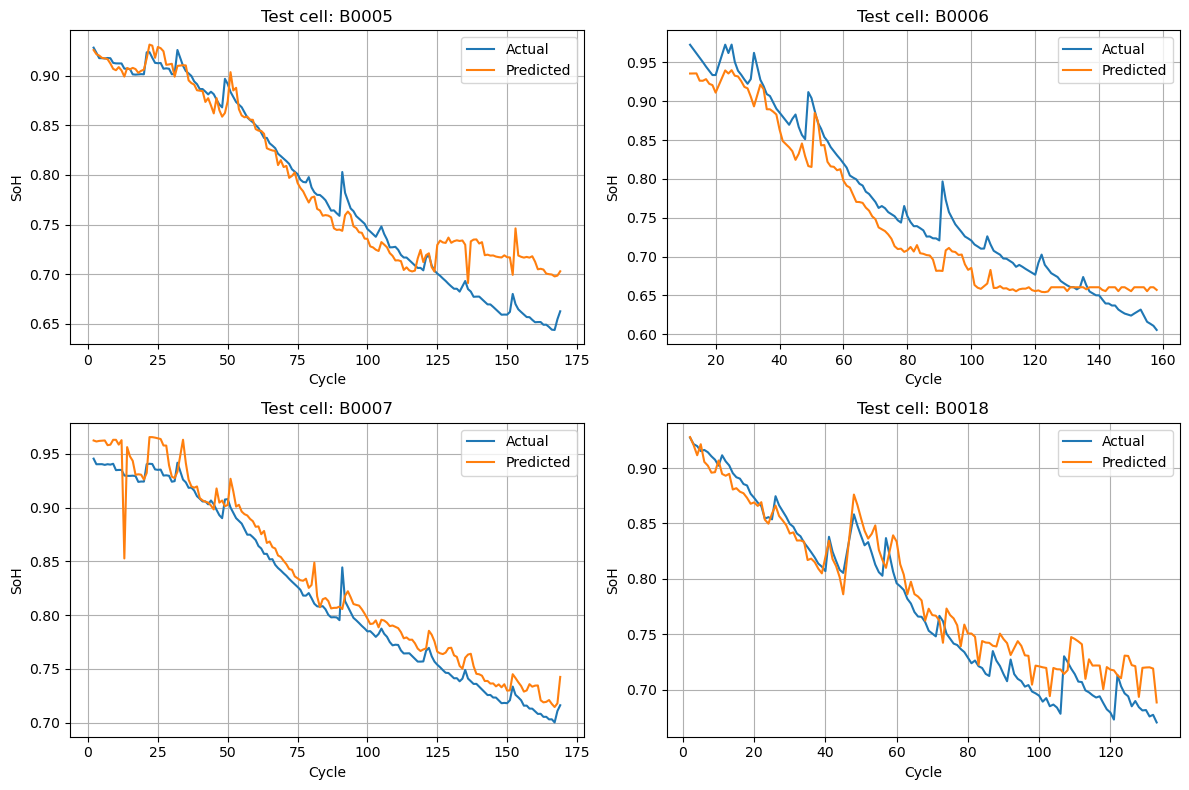

Dataset: Nasa
Regressor: RF
Type: Regular


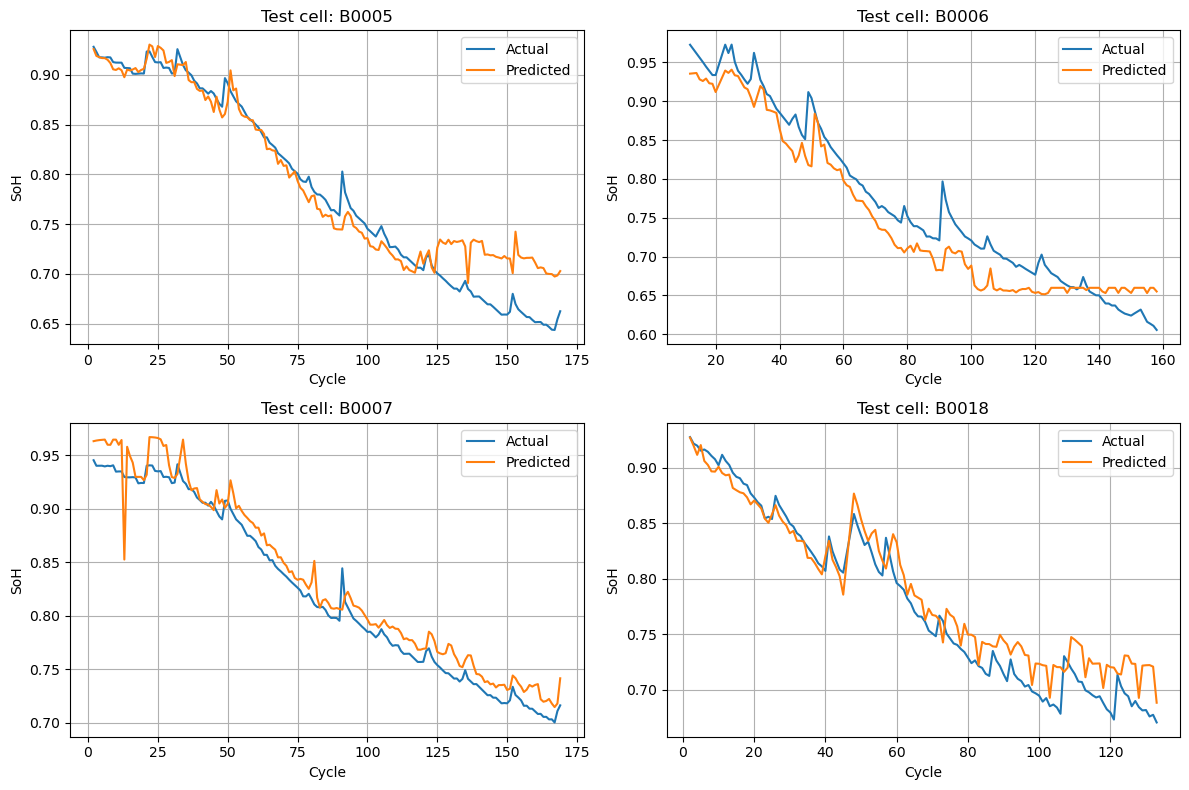

Dataset: Nasa
Regressor: XGB
Type: Hyper


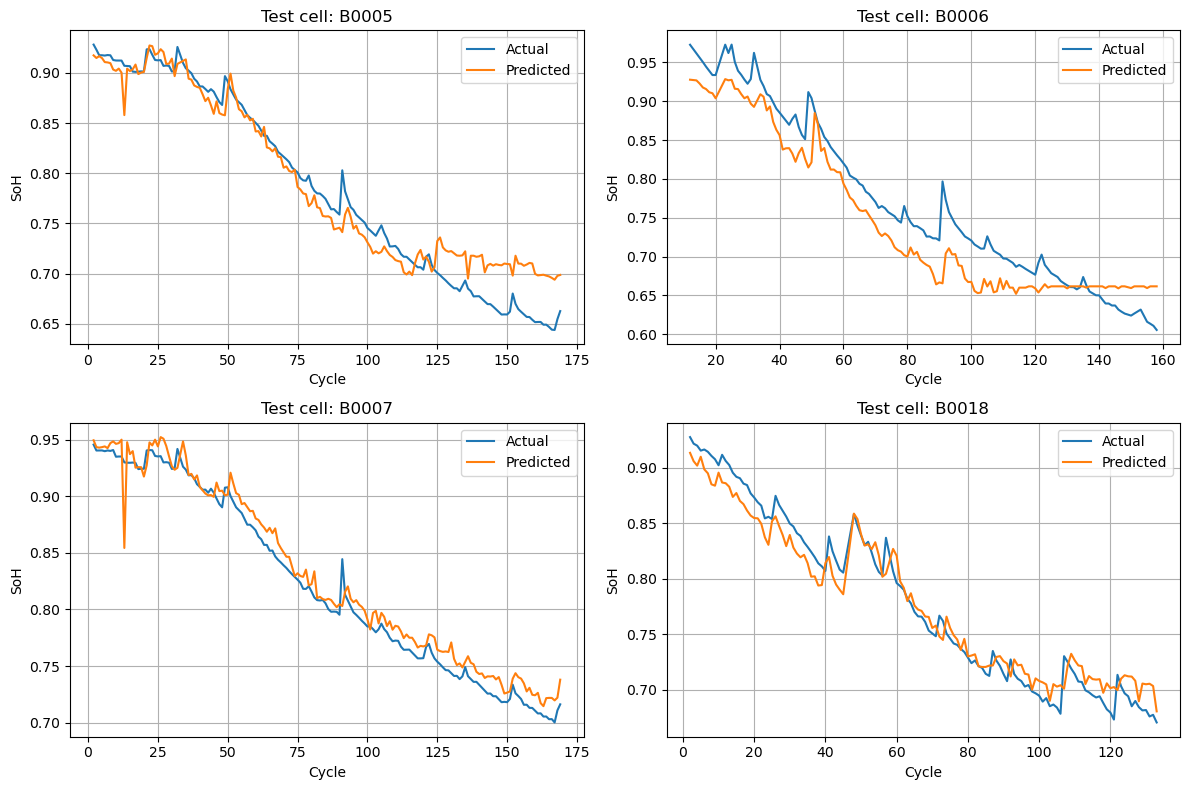

Dataset: Nasa
Regressor: XGB
Type: Regular


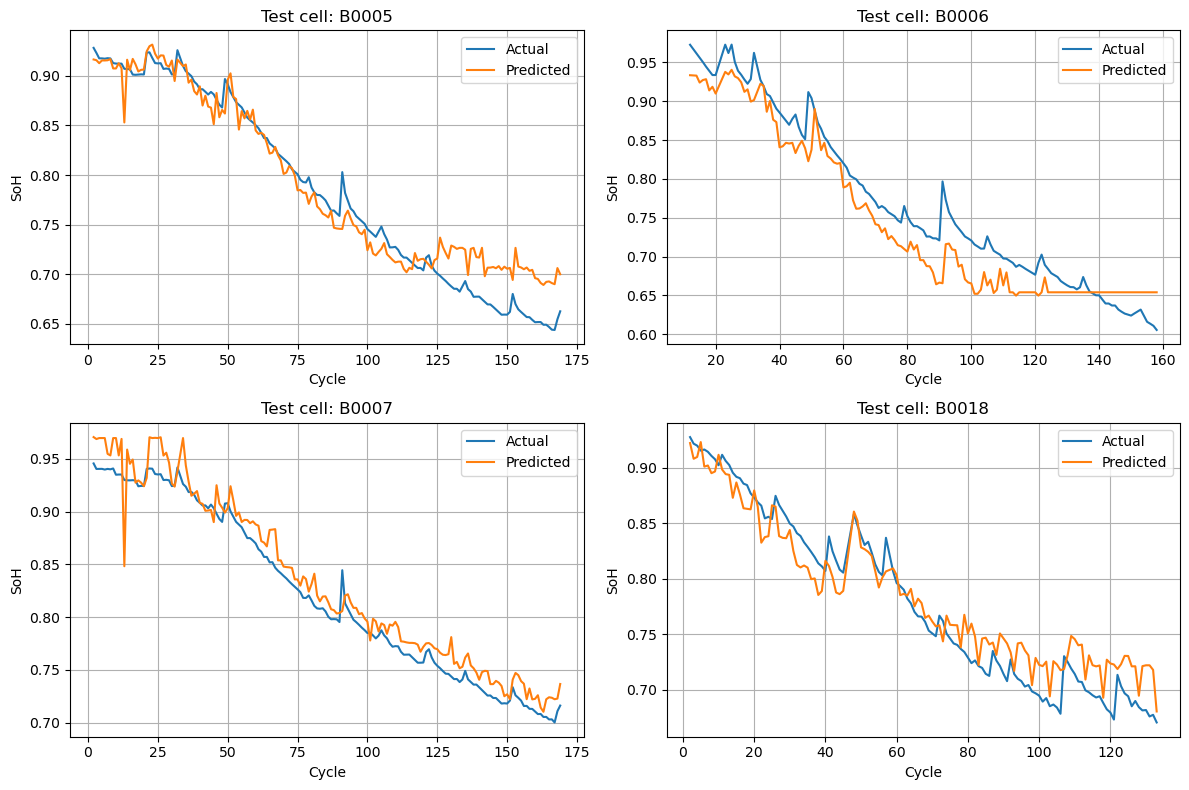

Dataset: Nasa
Regressor: LGBM
Type: Hyper


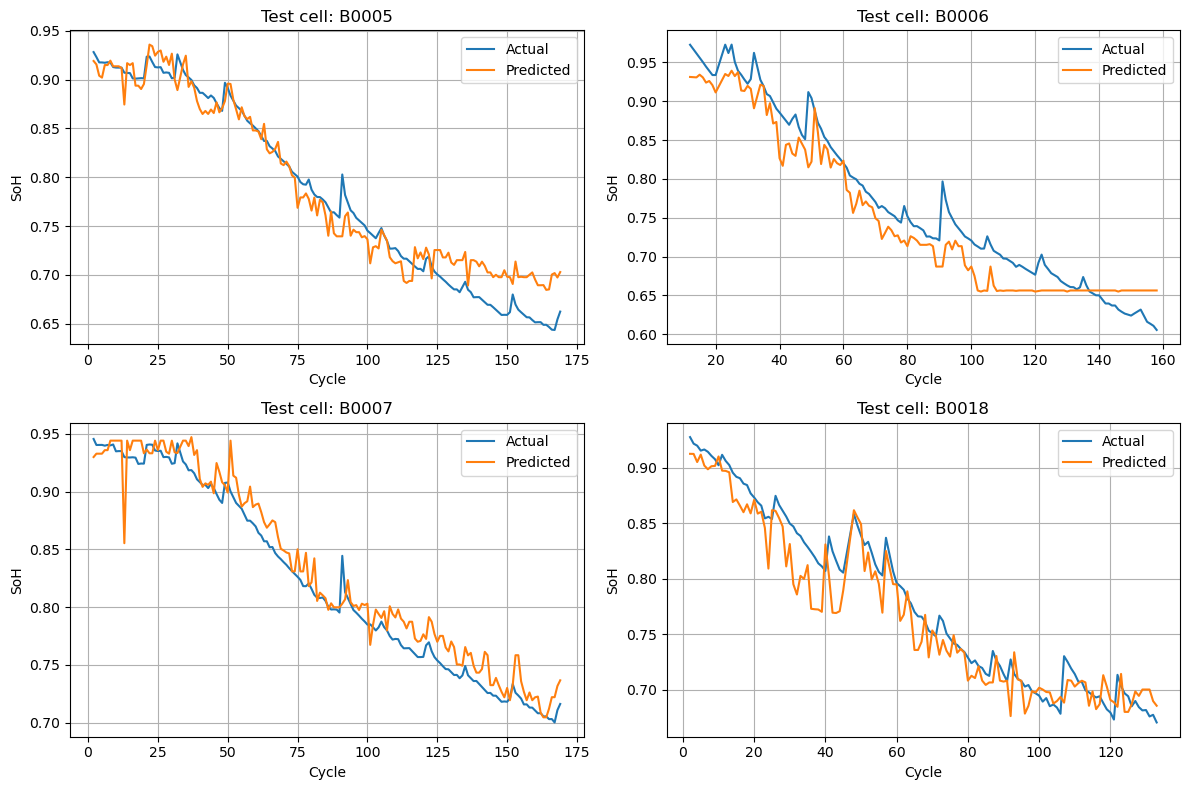

Dataset: Nasa
Regressor: LGBM
Type: Regular


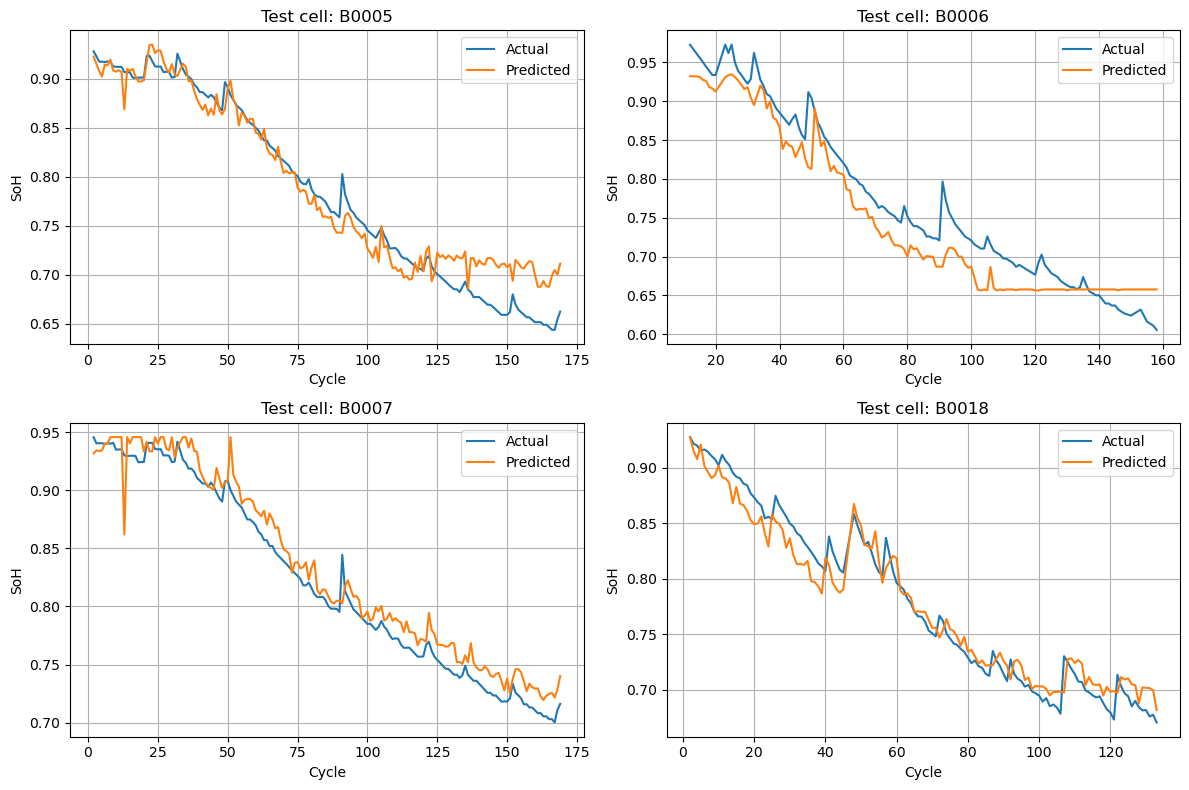

Dataset: Nasa
Regressor: CAT
Type: Hyper


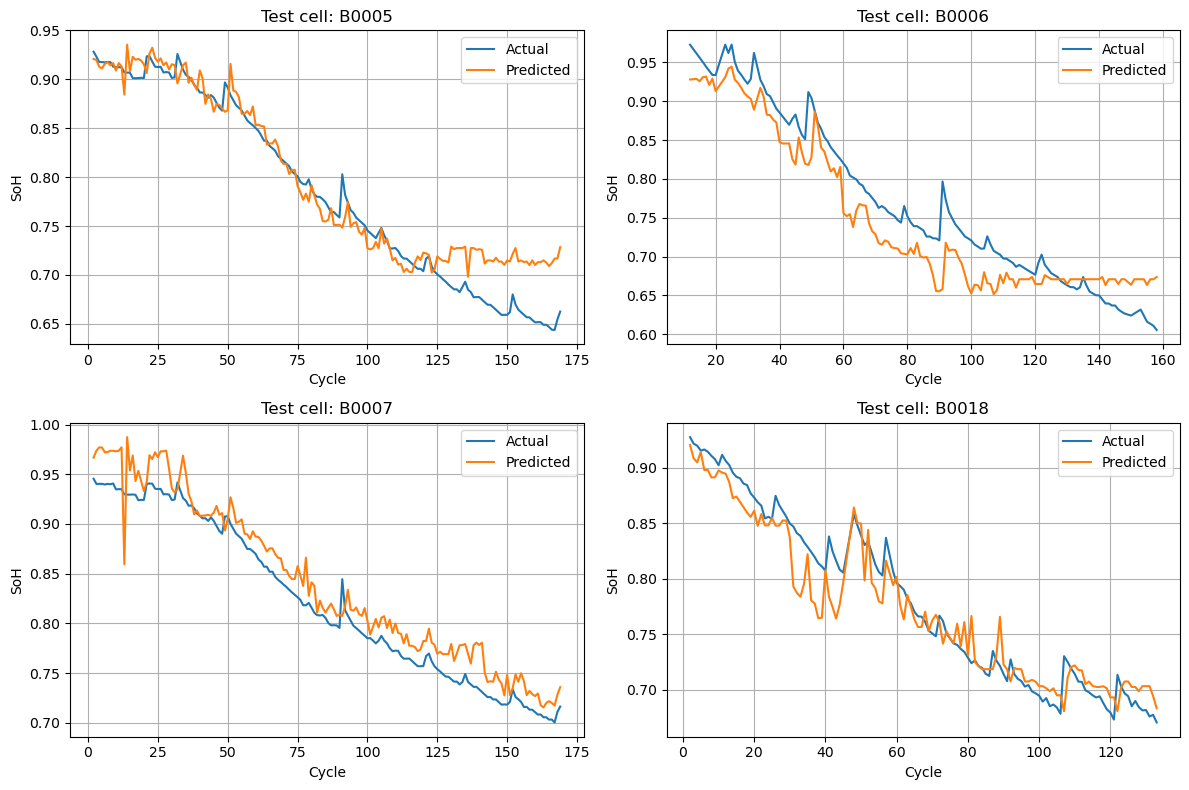

Dataset: Nasa
Regressor: CAT
Type: Regular


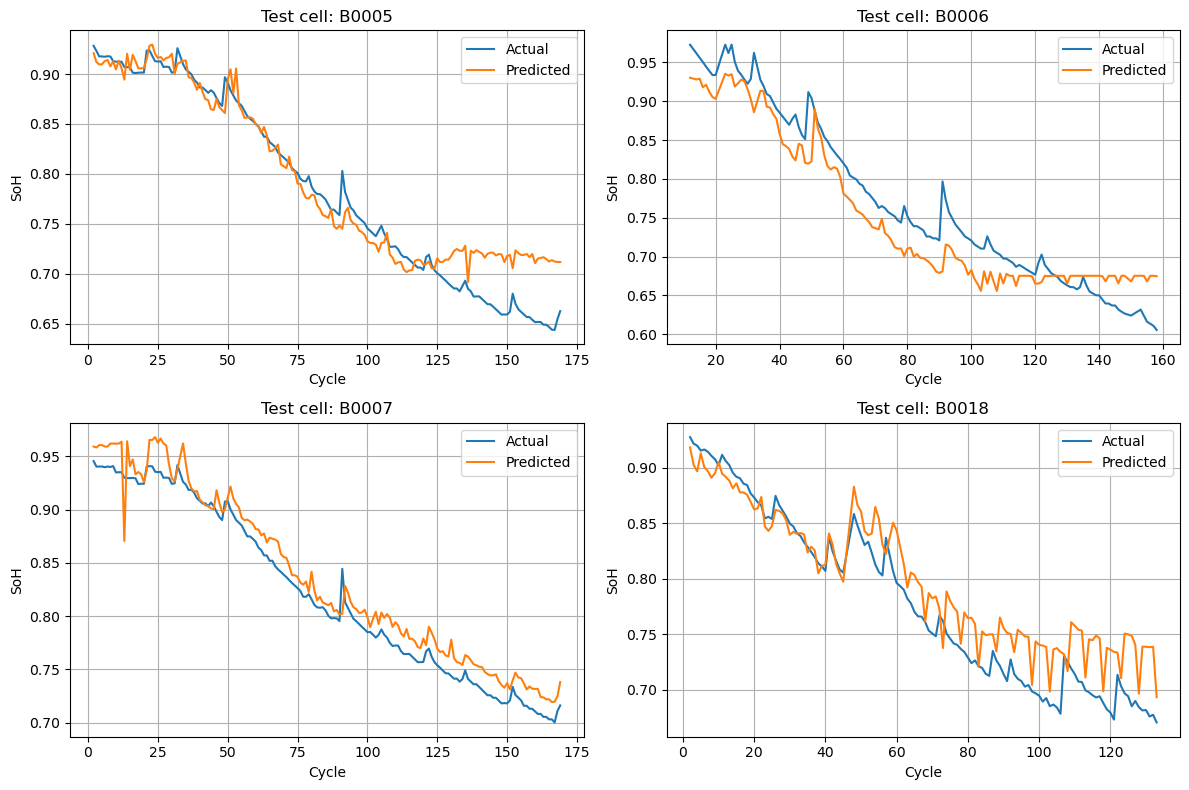

Dataset: Calce
Regressor: RF
Type: Hyper


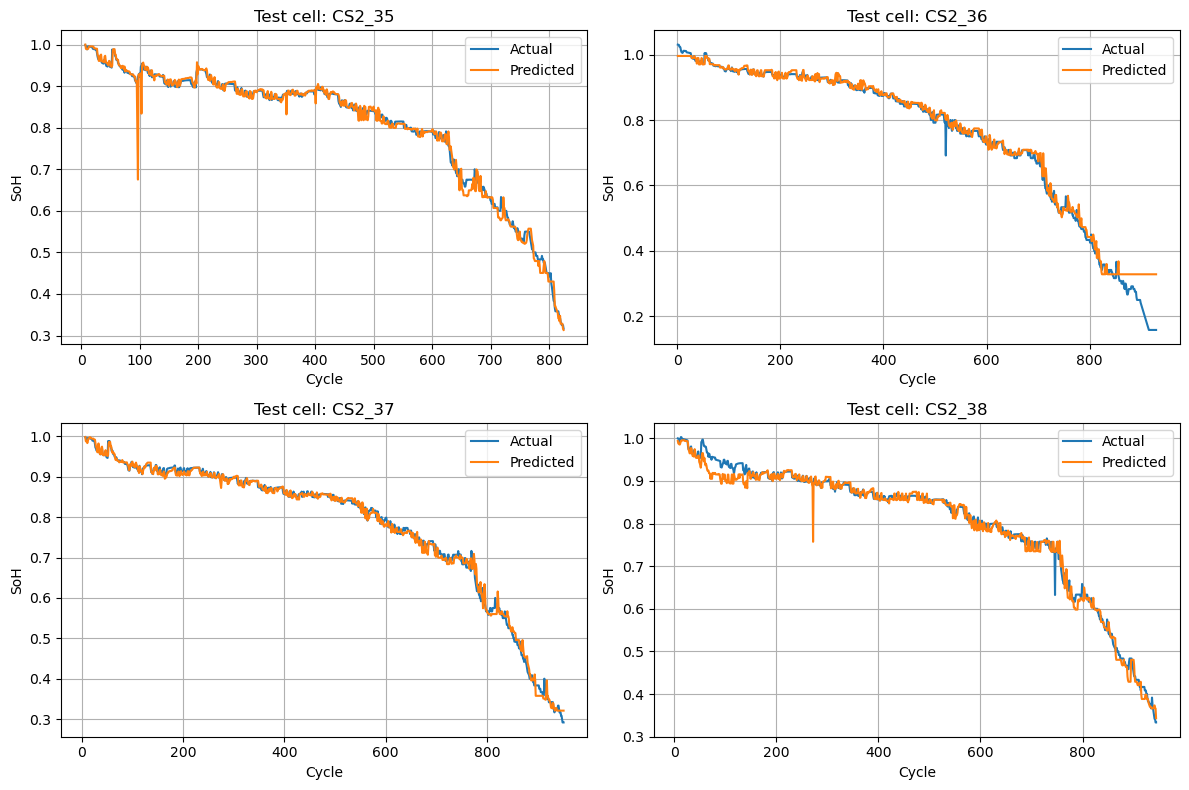

Dataset: Calce
Regressor: RF
Type: Regular


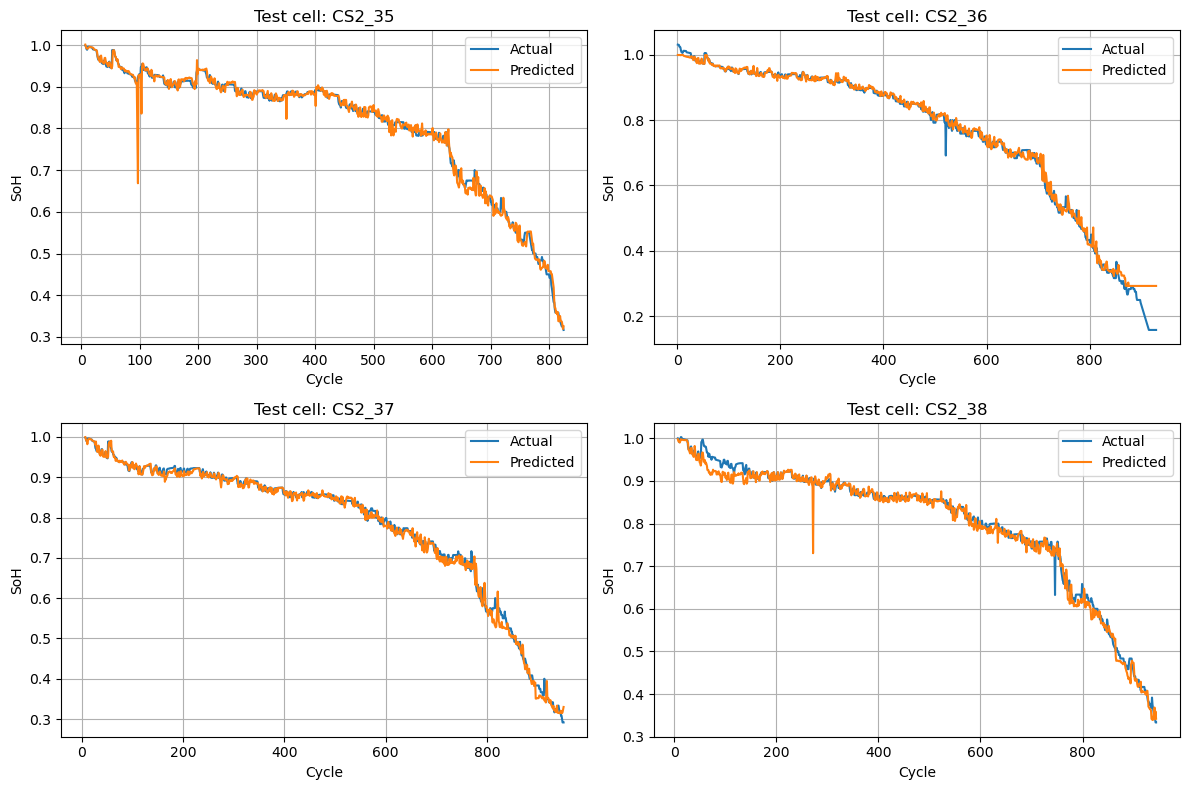

Dataset: Calce
Regressor: XGB
Type: Hyper


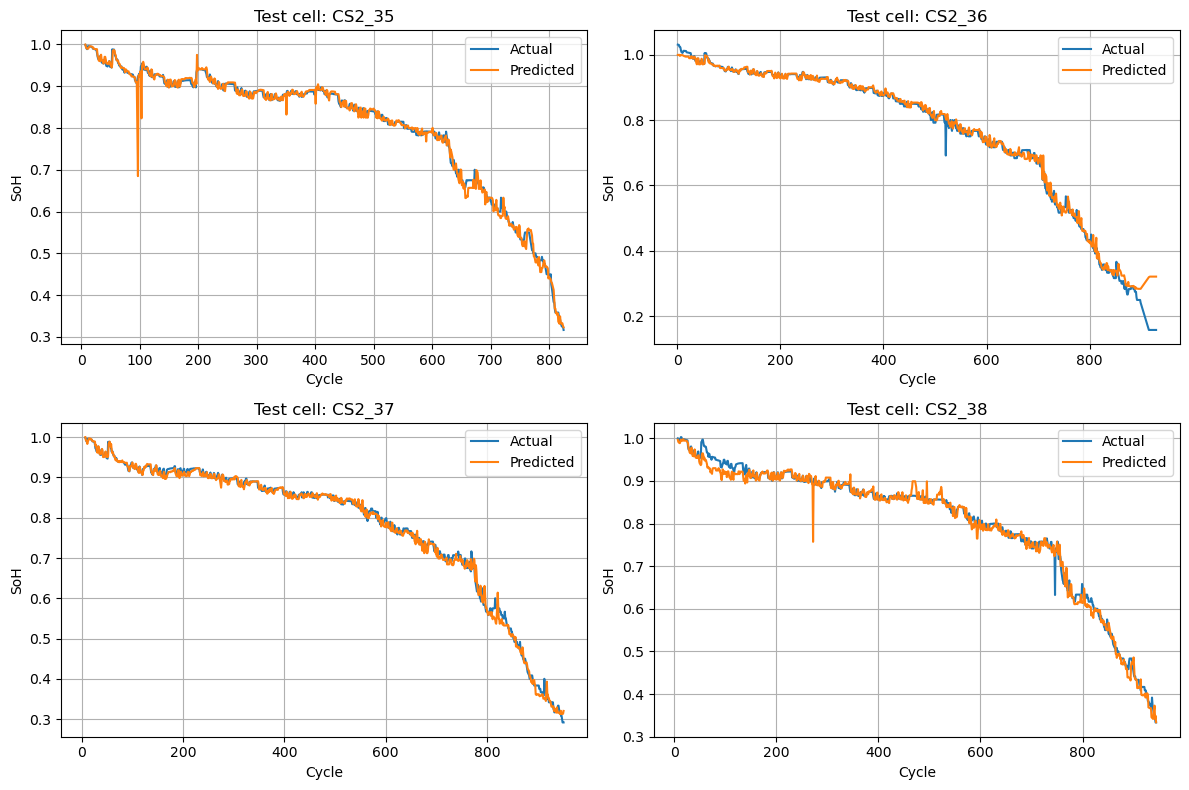

Dataset: Calce
Regressor: XGB
Type: Regular


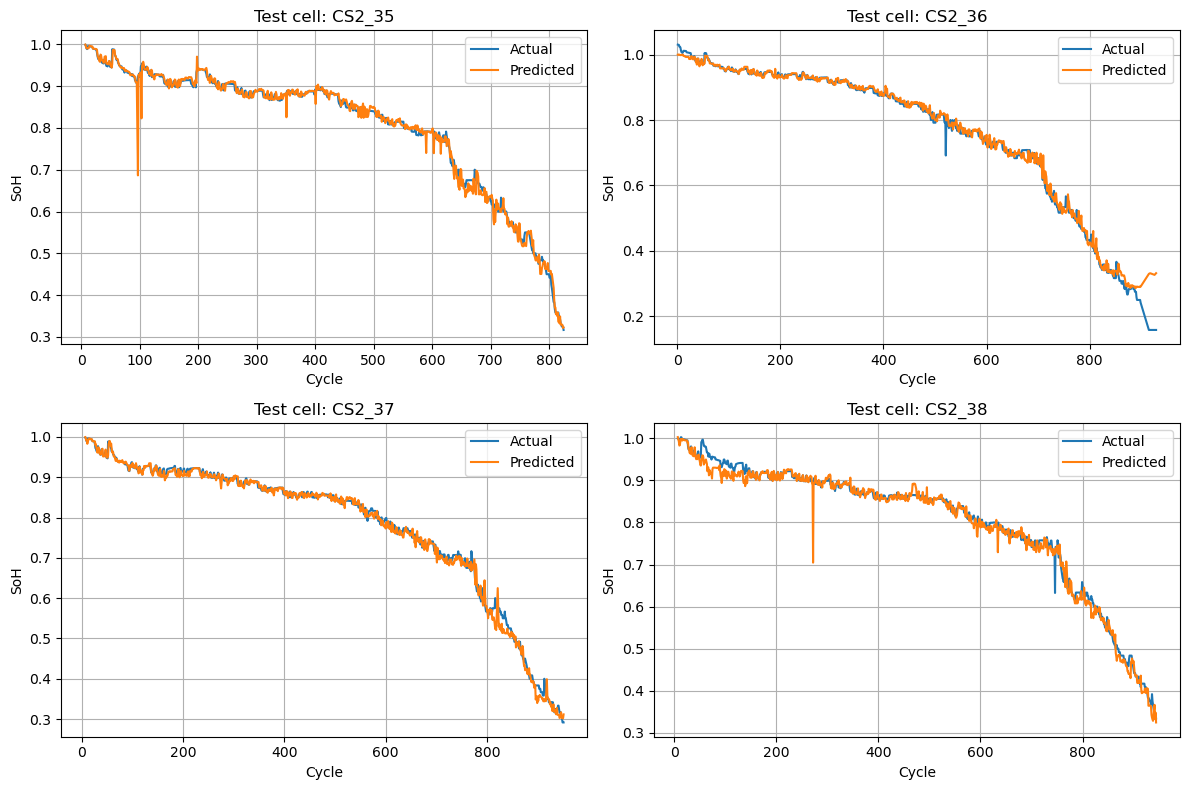

Dataset: Calce
Regressor: LGBM
Type: Hyper


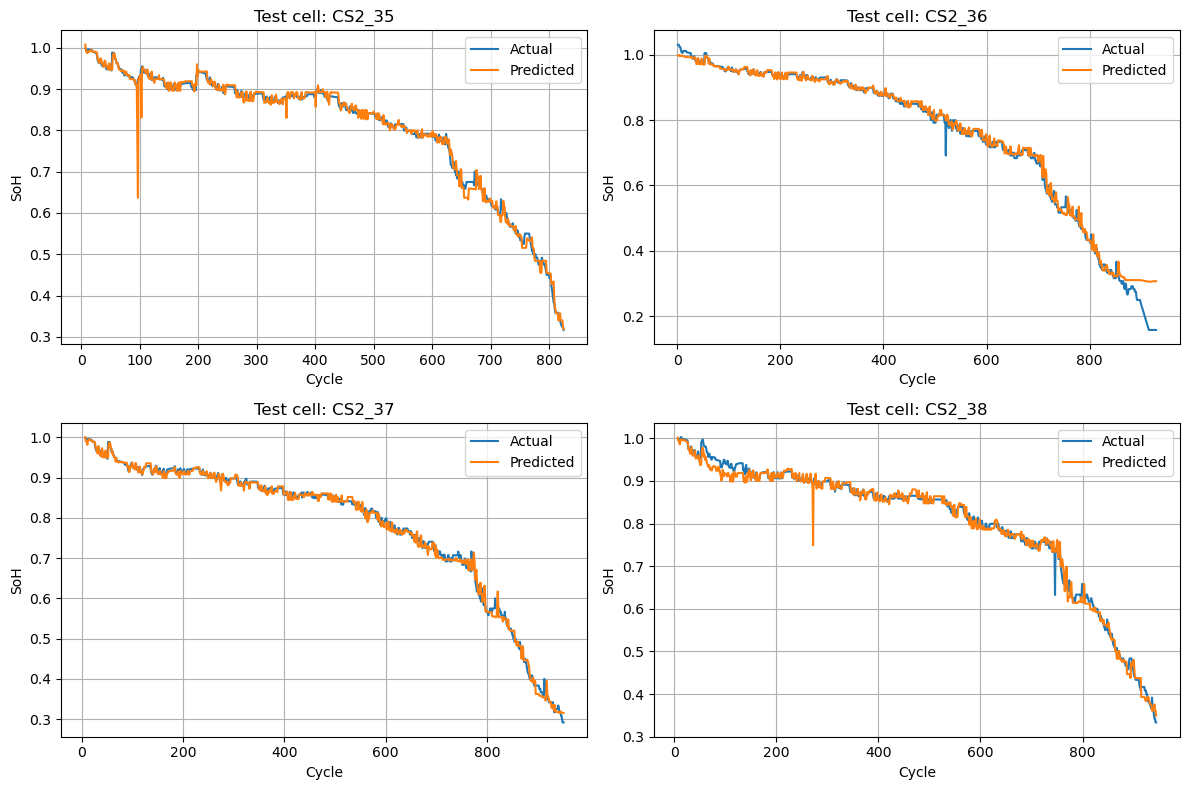

Dataset: Calce
Regressor: LGBM
Type: Regular


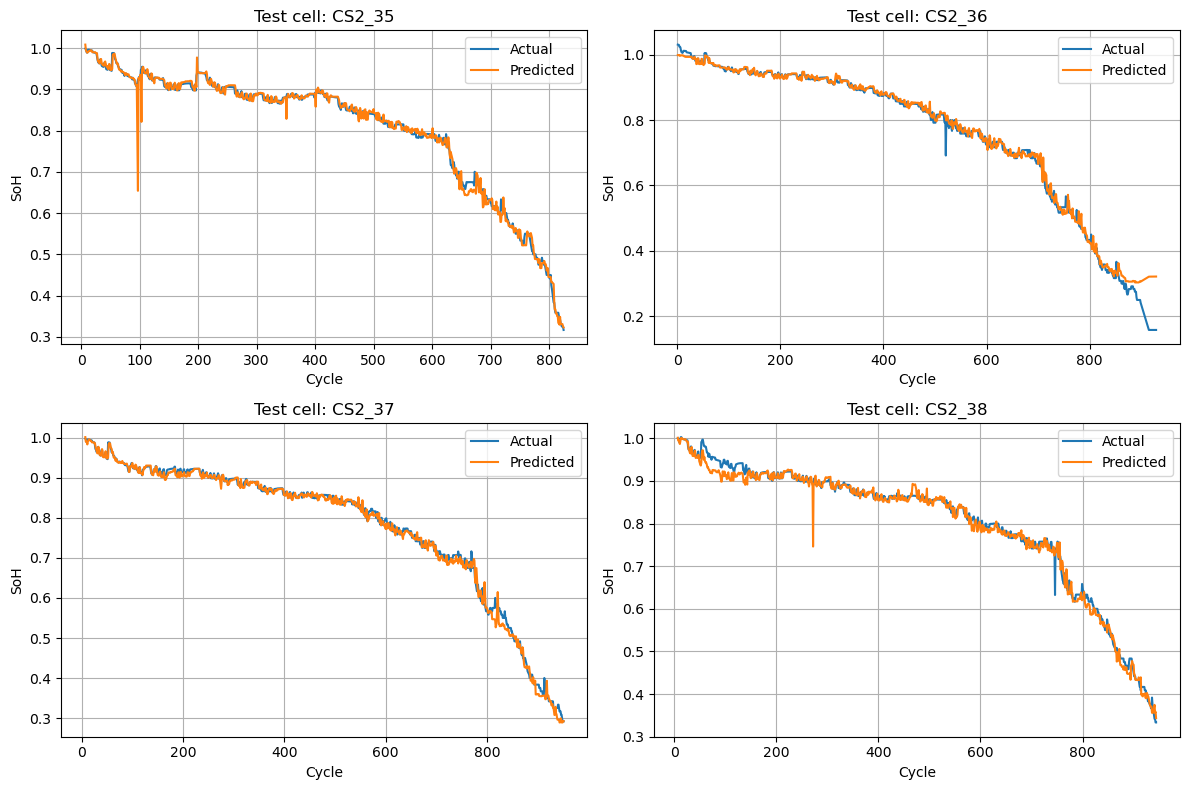

Dataset: Calce
Regressor: CAT
Type: Hyper


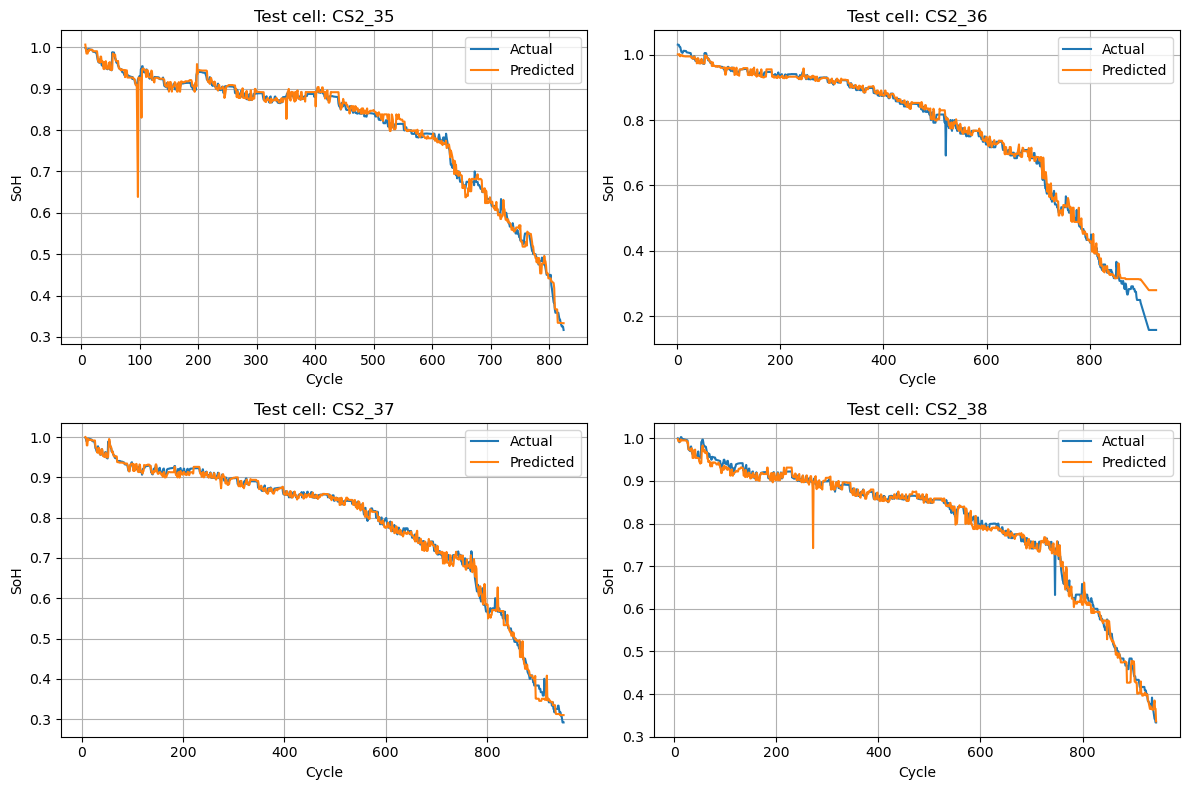

Dataset: Calce
Regressor: CAT
Type: Regular


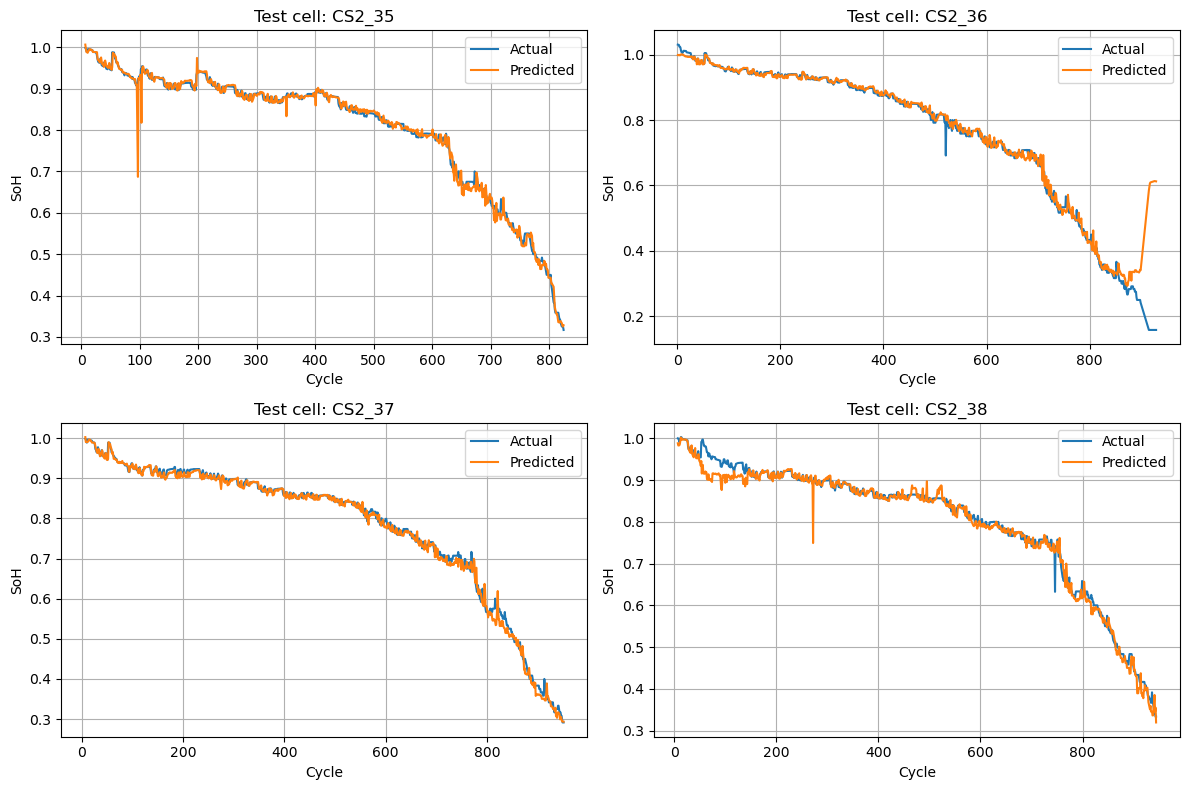

In [8]:
datasetss = ['Nasa', 'Calce']
regressors = ['RF', 'XGB', 'LGBM', 'CAT']
types = ['Hyper', 'Regular']

for dataset in datasetss:
    for regressor in regressors:
        for type in types:

            print(f"Dataset: {dataset}")
            print(f"Regressor: {regressor}")
            print(f"Type: {type}")

            datasets, file_names = load_data(dataset)
            model = create_model(dataset, regressor, type)
            test_results = train_and_test(model, datasets)
            plot_results(test_results,  file_names, dataset, regressor, type)
